In [1]:
! pip install -qq  langchain-openai langchain langgraph fpdf

  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.7/43.7 kB 3.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 74.5/74.5 kB 8.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 153.3/153.3 kB 15.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.9/43.9 kB 2.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.6/54.6 kB 5.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 216.7/216.7 kB 21.9 MB/s eta 0:00:00


# ***Database Setup***

In [2]:
import sqlite3
conn = sqlite3.connect("store.db", check_same_thread = False)

#create users table
conn.execute('''
CREATE TABLE IF NOT EXISTS users (
    id INTEGER PRIMARY KEY,
    name TEXT,
    email TEXT,
    signup_date DATE
)
''')

# Create orders table
conn.execute('''
CREATE TABLE IF NOT EXISTS orders (
    id INTEGER PRIMARY KEY,
    user_id INTEGER,
    amount REAL,
    status TEXT,
    order_date DATE,
    FOREIGN KEY(user_id) REFERENCES users(id)
)
''')

# Insert users
conn.execute("INSERT INTO users VALUES (1, 'Alice', 'alice@example.com', '2024-01-10')")
conn.execute("INSERT INTO users VALUES (2, 'Bob', 'bob@example.com', '2024-03-15')")
conn.execute("INSERT INTO users VALUES (3, 'Charlie', 'charlie@example.com', '2024-03-22')")
conn.execute("INSERT INTO users VALUES (4, 'Diana', 'diana@example.com', '2024-04-05')")
conn.execute("INSERT INTO users VALUES (5, 'Eve', 'eve@example.com', '2024-04-25')")
conn.execute("INSERT INTO users VALUES (6, 'Frank', 'frank@example.com', '2024-05-15')")
conn.execute("INSERT INTO users VALUES (7, 'Grace', 'grace@example.com', '2024-05-18')")
conn.execute("INSERT INTO users VALUES (8, 'Henry', 'henry@example.com', '2024-05-20')")
conn.execute("INSERT INTO users VALUES (9, 'Ivy', 'ivy@example.com', '2024-06-01')")
conn.execute("INSERT INTO users VALUES (10, 'Jack', 'jack@example.com', '2024-06-05')")
conn.execute("INSERT INTO users VALUES (11, 'Kiran', 'kiran@example.com', '2024-06-03')")
conn.execute("INSERT INTO users VALUES (12, 'Lata', 'lata@example.com', '2024-06-04')")
conn.execute("INSERT INTO users VALUES (13, 'Manoj', 'manoj@example.com', '2024-06-06')")

# Insert orders
conn.execute("INSERT INTO orders VALUES (1, 1, 250.00, 'completed', '2024-03-10')")
conn.execute("INSERT INTO orders VALUES (2, 2, 100.00, 'pending', '2024-03-16')")
conn.execute("INSERT INTO orders VALUES (3, 3, 320.00, 'completed', '2024-03-24')")
conn.execute("INSERT INTO orders VALUES (4, 4, 180.00, 'completed', '2024-05-01')")
conn.execute("INSERT INTO orders VALUES (5, 5, 210.00, 'completed', '2024-05-02')")
conn.execute("INSERT INTO orders VALUES (6, 1, 180.00, 'completed', '2024-03-18')")
conn.execute("INSERT INTO orders VALUES (7, 2, 120.00, 'completed', '2024-03-20')")
conn.execute("INSERT INTO orders VALUES (8, 1, 300.00, 'completed', '2024-04-01')")
conn.execute("INSERT INTO orders VALUES (9, 3, 80.00, 'cancelled', '2024-04-10')")
conn.execute("INSERT INTO orders VALUES (10, 4, 250.00, 'pending', '2024-05-05')")
conn.execute("INSERT INTO orders VALUES (11, 6, 400.00, 'completed', '2024-05-20')")
conn.execute("INSERT INTO orders VALUES (12, 7, 320.00, 'completed', '2024-05-22')")
conn.execute("INSERT INTO orders VALUES (13, 8, 150.00, 'pending', '2024-05-25')")
conn.execute("INSERT INTO orders VALUES (14, 9, 220.00, 'completed', '2024-06-02')")
conn.execute("INSERT INTO orders VALUES (15, 10, 500.00, 'completed', '2024-06-06')")


conn.commit()

In [3]:
from langchain.agents import tool

@tool
def get_schema() -> str:
  """
  Returns the schema of the available databases.
  """
  schema = ""
  for table in ["users", "orders"]:
    rows = conn.execute(f"PRAGMA table_info({table})").fetchall()
    cols = ",".join([f"{row[1]} {row[2]}" for row in rows])
    schema += f"{table}({cols}) \n"
  return schema.strip()


@tool
def execute_sql(query: str) -> str:
  """
  Executes the SQL Query and returns the results.
  """
  try:
    res = conn.execute(query).fetchall()
    return str(res)
  except Exception as e:
    print(f"Exception {e} occurred while executing the query {query}")




In [ ]:
from langgraph.graph import StateGraph, START, END
from langgraph.graph.message import AnyMessage, add_messages
from langgraph.prebuilt import ToolNode, create_react_agent, tools_condition
from langchain_openai import ChatOpenAI
from typing import TypedDict, Annotated
from langchain.schema import AIMessage, SystemMessage, HumanMessage
import os


os.environ["LANGCHAIN_TRACING_V2"] = "true"
os.environ["LANGCHAIN_ENDPOINT"] = "https://api.smith.langchain.com"
os.environ["LANGCHAIN_API_KEY"] = ""
os.environ["LANGCHAIN_PROJECT"] = ""
os.environ["OPENAI_API_KEY"] = ""

In [5]:
llm = ChatOpenAI(model = "gpt-4o-mini")

# ***Supervisor Agent - Co-ordinates agents***
# ***Analyst Agent - Asks Questions***
# ***Expert Agent - Answers Questions***
# ***Reviewer Agent - Creates a summary and gives pdf document***

# ***Analyst Agent***

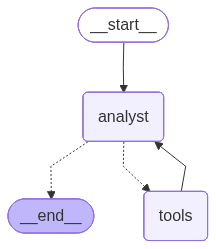

In [6]:
#analyst agent
analyst_llm = llm.bind_tools([get_schema])

analyst_system_message = [SystemMessage(content = """
You are an experienced data analyst. Your role is to fetch the schema of the databases using the tools. Frame 10 insightful questions based upon the schema. The questions framed
will be helpful in generating a comprehensive report.
""")]

class AnalystState(TypedDict):
  messages : Annotated[list[AnyMessage], add_messages]

def analyst(state: AnalystState) -> AnalystState:
  analyst_questions = analyst_llm.invoke(analyst_system_message + state["messages"])
  return {"messages":[analyst_questions]}

analyst_graph = StateGraph(AnalystState)

analyst_graph.add_node("analyst",analyst)
analyst_graph.add_node("tools",ToolNode([get_schema]))

analyst_graph.add_edge(START, "analyst")
analyst_graph.add_conditional_edges("analyst", tools_condition)
analyst_graph.add_edge("tools", "analyst")

analyst_app = analyst_graph.compile()

analyst_app

In [7]:
input_message = {"messages": HumanMessage("")}
final_message = None
for output in analyst_app.stream(input_message):
  for key, value in output.items():
    print(f"Node {key}")
    print(value["messages"])
    final_message = value["messages"]
if final_message:
  print(f"Final Response from Analyst Agent : {final_message[0].content}")


Node analyst
[AIMessage(content='', additional_kwargs={'tool_calls': [{'id': 'call_d1No9M3dILfCDJ2DPUauI7It', 'function': {'arguments': '{}', 'name': 'get_schema'}, 'type': 'function'}], 'refusal': None}, response_metadata={'token_usage': {'completion_tokens': 10, 'prompt_tokens': 84, 'total_tokens': 94, 'completion_tokens_details': {'accepted_prediction_tokens': 0, 'audio_tokens': 0, 'reasoning_tokens': 0, 'rejected_prediction_tokens': 0}, 'prompt_tokens_details': {'audio_tokens': 0, 'cached_tokens': 0}}, 'model_name': 'gpt-4o-mini-2024-07-18', 'system_fingerprint': 'fp_8bda4d3a2c', 'id': 'chatcmpl-CCGS1v7GIgbGsgdiArQS9KmTgZYwd', 'service_tier': 'default', 'finish_reason': 'tool_calls', 'logprobs': None}, id='run--dcf85c53-036e-4f01-a333-9a824d92f9bb-0', tool_calls=[{'name': 'get_schema', 'args': {}, 'id': 'call_d1No9M3dILfCDJ2DPUauI7It', 'type': 'tool_call'}], usage_metadata={'input_tokens': 84, 'output_tokens': 10, 'total_tokens': 94, 'input_token_details': {'audio': 0, 'cache_read'

# ***Expert Agent***

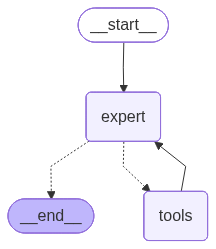

In [8]:
#expert agent
expert_llm = llm.bind_tools([get_schema, execute_sql])

expert_system_message = [SystemMessage(content = """
You are an experienced SQL Agent. Your role is to understand the natural language query, create an equivalent sql query, execute the sql query and return the results using the tools.
""")]

class ExpertState(TypedDict):
  messages : Annotated[list[AnyMessage], add_messages]

def expert(state: ExpertState) -> ExpertState:
  expert_answers = expert_llm.invoke(expert_system_message + state["messages"])
  return {"messages":[expert_answers]}

expert_graph = StateGraph(ExpertState)

expert_graph.add_node("expert",expert)
expert_graph.add_node("tools",ToolNode([get_schema, execute_sql]))

expert_graph.add_edge(START, "expert")
expert_graph.add_conditional_edges("expert", tools_condition)
expert_graph.add_edge("tools", "expert")

expert_app = expert_graph.compile()

expert_app

# ***Reviewer Agent***

In [9]:
from langchain.tools import tool
from fpdf import FPDF

@tool
def generate_pdf(text: str, filename: str = "summary_report.pdf") -> str:
  """
  converts the provided text summary into a downloadable PDF Report.
  Returns the File Path.
  """
  try:
    pdf = FPDF()
    pdf.add_page()
    pdf.set_auto_page_break(auto = True, margin = 15)
    pdf.set_font("Arial", size = 12)

    for line in text.split("\n"):
      pdf.multi_cell(0, 10, line)

    file_path = f"/content/{filename}"
    pdf.output(file_path)
    return file_path
  except Exception as e:
    print(f"Exception {str(e)} occurred while generating the {filename}")


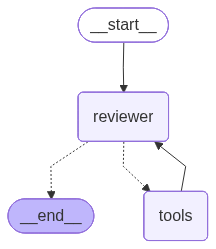

In [10]:
#reviewer agent
reviewer_llm = llm.bind_tools([generate_pdf])

reviewer_system_message = [SystemMessage(content = """
You are an experienced reviewer. Your role is to summarize in detailed the database reports. Produce concise and insightful summary in 100 words. Summarize in a manner that person with technical
/non-technical back ground should clearly grasp the content. Generated Summary is presented in the form of a PDF.
""")]

class ReviewerState(TypedDict):
  messages : Annotated[list[AnyMessage], add_messages]

def reviewer(state: ReviewerState) -> ReviewerState:
  reviewer_answers = reviewer_llm.invoke(reviewer_system_message + state["messages"])
  return {"messages":[reviewer_answers]}

reviewer_graph = StateGraph(ReviewerState)

reviewer_graph.add_node("reviewer",reviewer)
reviewer_graph.add_node("tools",ToolNode([generate_pdf]))

reviewer_graph.add_edge(START, "reviewer")
reviewer_graph.add_conditional_edges("reviewer", tools_condition)
reviewer_graph.add_edge("tools", "reviewer")

reviewer_app = reviewer_graph.compile()

reviewer_app

# ***Supervisor Agent***

In [11]:
#supervisor
from pydantic import BaseModel, Field
from typing import Literal

class SuperVisorAgent(BaseModel):
  """
  Select the appropriate agent for execution of flow , else route to END.
  """
  next_agent: Literal["analyst", "expert", "reviewer", "END"] = Field(
      description = "return the next_agent to perform the task in the workflow."
  )

supervisor_llm = llm.with_structured_output(SuperVisorAgent)

In [12]:
supervisor_system_message = [SystemMessage("""
You are an supervisor agent for orchestrating three roles : [analyst, expert, reviewer].

1. The analyst understands the database schema and generates insightful questions.
2. The expert answers the questions by converting the natural language query into SQL query and executes the query using the available tools.
3. The reviewer summarizes the expert's answers and publishes into a report in the form of a pdf.

At each step:
- set the 'next_agent' to one of : "analyst", "expert", "reviewer", "END"
- First route to analyst for exploration of schema and generation of questions
- once the questions are frames, route to the expert for answering the questions
- After expert's answers, route to the reviewer for summarizing and generating a pdf report
- Finally, route to "END" when the process is complete.

Your task is to coordinate and decide the next best agent for completion of workflow.
""")]

In [13]:
class SuperVisorState(TypedDict):
  messages : Annotated[list[AnyMessage], add_messages]
  next_agent: Literal["analyst", "expert", "reviewer", "END"]

def supervisor(state: SuperVisorState) -> SuperVisorState:
  supervisor_commands = supervisor_llm.invoke(supervisor_system_message + state["messages"])
  return {"messages":[AIMessage(content = f"Routing to: {supervisor_commands.next_agent}")],
          "next_agent": supervisor_commands.next_agent
          }
def supervisor_response(state: SuperVisorState) -> Literal["analyst", "expert", "reviewer", "__end__"]:
  """
  Route based on the response from the supervisor.
  """
  next_agent = state.get("next_agent")
  if next_agent == "END":
    return "__end__"
  else:
    return next_agent


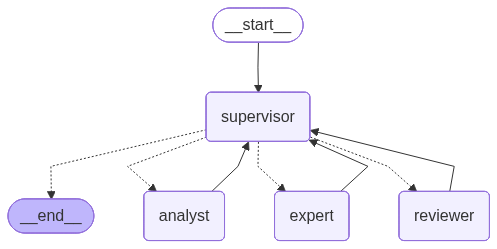

In [14]:
supervisor_graph = StateGraph(SuperVisorState)

supervisor_graph.add_node("supervisor",supervisor)
supervisor_graph.add_node("analyst",analyst_app)
supervisor_graph.add_node("expert",expert_app)
supervisor_graph.add_node("reviewer",reviewer_app)



supervisor_graph.add_edge(START, "supervisor")
supervisor_graph.add_conditional_edges("supervisor", supervisor_response)
supervisor_graph.add_edge("analyst", "supervisor")
supervisor_graph.add_edge("expert", "supervisor")
supervisor_graph.add_edge("reviewer", "supervisor")

app = supervisor_graph.compile()

app

In [15]:
input_message = {"messages": HumanMessage(content = "Generate summary report based on tables in my database.")}
for output in app.stream(input_message):
  for key, value in output.items():
    print("="*50)
    print(f" 📍 Node {key}")
    print("-"*50)
    for message in value["messages"]:
      print(f"{message.type.upper()} : {message.content}\n")
    print("="*50)


 📍 Node supervisor
--------------------------------------------------
AI : Routing to: analyst

 📍 Node analyst
--------------------------------------------------
HUMAN : Generate summary report based on tables in my database.

AI : Routing to: analyst

AI : 

TOOL : users(id INTEGER,name TEXT,email TEXT,signup_date DATE) 
orders(id INTEGER,user_id INTEGER,amount REAL,status TEXT,order_date DATE)

AI : Based on the schema of the database, which includes the following tables:

1. **Users:**
   - `id` (INTEGER)
   - `name` (TEXT)
   - `email` (TEXT)
   - `signup_date` (DATE)

2. **Orders:**
   - `id` (INTEGER)
   - `user_id` (INTEGER) - foreign key referencing `Users(id)`
   - `amount` (REAL)
   - `status` (TEXT)
   - `order_date` (DATE)

Here are 10 insightful questions that could help in generating a comprehensive report:

1. **User Demographics:**
   - What is the total number of users in the database, and how has the user base grown over time since the first signup?

2. **User Engage